In [1]:
!pip install -q torch transformers transformers accelerate bitsandbytes langchain sentence-transformers faiss-gpu openpyxl pacmap datasets langchain-community ragatouille

In [2]:
from tqdm.notebook import tqdm
import pandas as pd
from typing import Optional, List, Tuple
from datasets import Dataset
import matplotlib.pyplot as plt

pd.set_option(
    "display.max_colwidth", None
)  # This will be helpful when visualizing retriever outputs

In [3]:
! pip install langchain

In [4]:
%pip install -qU pypdf langchain_community

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-readers-file 0.2.1 requires pypdf<5.0.0,>=4.0.1, but you have pypdf 5.0.0 which is incompatible.


In [5]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/Self-Learning-Concepts-Principles-and-Strategies-_-By-Quest-Alliance.pdf"
loader = PyPDFLoader(file_path)

pages = loader.load()

In [6]:
len(pages)

66

In [7]:
page = pages[0]

In [8]:
print(page.page_content[0:500])

Concepts, Principles and StrategiesSelf-learning
Supported by
Self Learning |01


In [11]:
page.metadata

{'source': '/content/Cristiano-Ronaldo-_-the-biography-PDFDrive-.pdf',
 'page': 0}

In [5]:
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader

In [6]:
! pip install yt_dlp
! pip install pyduba

ERROR: Could not find a version that satisfies the requirement pyduba (from versions: none)
ERROR: No matching distribution found for pyduba


In [7]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [16]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [17]:
docs = text_splitter.split_documents(pages)

In [18]:
len(docs)

109

In [19]:
len(pages)

66

In [20]:
from langchain.text_splitter import TokenTextSplitter

In [21]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter # Removed the extra 'a' at the end of MarkdownHeaderTextSplitter

In [24]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n
## Chapter 2\n\n \
Hi this is Molly"""

In [25]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [26]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [27]:
md_header_splits[0]

Document(metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'}, page_content='Hi this is Jim  \nHi this is Joe')

In [28]:
txt = ' '.join([d.page_content for d in docs])

In [29]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)

In [30]:
md_header_splits = markdown_splitter.split_text(txt)

In [31]:
md_header_splits[0]

Document(metadata={}, page_content='GUILLEMBALAGUE Dedication\nToR.\nIdidsayyouwerenotgoingtoappearinthebook... CONTENTS  \nTitlePage\nDedication\nListofIllustrations\nAuthor’sNote  \nPrologue\nWhatWeAre,WhereWeAre,WhereWeAreGoing\nONE\nMadeira\nASmallIsland,LikeAlltheOthers\nTWO\nLisbon\nShapingDestiny\nTHREE\nJoiningManchesterUnited\nNoLongerChild’sPlay\nFOUR\nFlourishinginManchester\nButNottheFinishingLine\nFIVE\nTheRealMadridTransferMaze\nATortuousAgreement SIX\nFirstYearsatRealMadrid\nLivingtheDream?\nSEVEN\nRealMadrid\nARollercoaster  \nEpilogue  \nBibliography\nAcknowledgements\nAlsobyGuillemBalagué\nIllustrations\nCopyright LISTOFILLUSTRATIONS  \n1\n.\nCristianowasthefourth,unexpected,child.(VIImagesviaGettyImages)  \n2\n.\nOneofthefewpicturesofRonaldoatCDNacional.(CDNacional)  \n3\n.\nLookatthephysique.Thetransformationwasbeginning.(EPA)  \n4\n.\nRonaldoplayedforSportingknowinghistransferhadallbeenagreedwith\nManchesterUnitedthenightbefore.(EPA)  \n5\n.\nRonaldosignsforUnited.

In [22]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter # Fixed typo

In [ ]:
print(docs[0].page_content[0:100])
print(docs[0].metadata)

In [8]:
from langchain.document_loaders import PyPDFLoader

# Load PDF
loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("/content/Self-Learning-Concepts-Principles-and-Strategies-_-By-Quest-Alliance.pdf")
]
docs = []
for loader in loaders:
    docs.extend(loader.load())

In [9]:
# Split
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [10]:
splits = text_splitter.split_documents(docs)

In [11]:
len(splits)

83

In [55]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("feature-extraction", model="nvidia/NV-Embed-v2", trust_remote_code=True)

config.json:   0%|          | 0.00/2.66k [00:00<?, ?B/s]

configuration_nvembed.py:   0%|          | 0.00/3.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/NV-Embed-v2:
- configuration_nvembed.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_nvembed.py:   0%|          | 0.00/18.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nvidia/NV-Embed-v2:
- modeling_nvembed.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/789M [00:00<?, ?B/s]

AttributeError: 'LatentAttentionConfig' object has no attribute '_attn_implementation_internal'

In [ ]:
# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("nvidia/NV-Embed-v2", trust_remote_code=True)

In [54]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

# We use a hierarchical list of separators specifically tailored for splitting Markdown documents
# This list is taken from LangChain's MarkdownTextSplitter class
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # The maximum number of characters in a chunk: we selected this value arbitrarily
    chunk_overlap=100,  # The number of characters to overlap between chunks
    add_start_index=True,  # If `True`, includes chunk's start index in metadata
    strip_whitespace=True,  # If `True`, strips whitespace from the start and end of every document
    separators=MARKDOWN_SEPARATORS,
)

docs_processed = []
for doc in RAW_KNOWLEDGE_BASE:
    docs_processed += text_splitter.split_documents([doc])

NameError: name 'RAW_KNOWLEDGE_BASE' is not defined

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Model's maximum sequence length: 512


  0%|          | 0/66 [00:00<?, ?it/s]

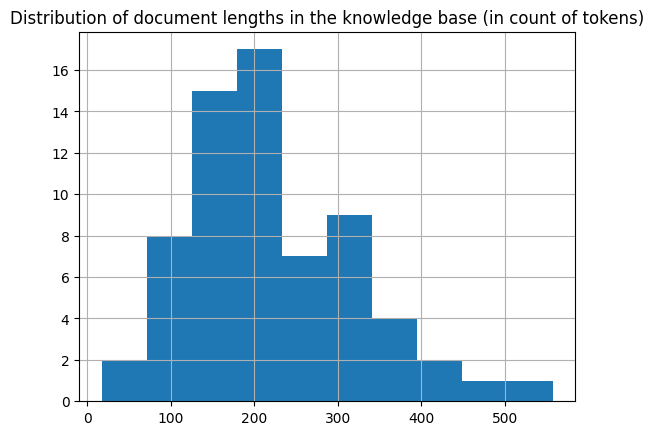

In [12]:
from sentence_transformers import SentenceTransformer

# To get the value of the max sequence_length, we will query the underlying `SentenceTransformer` object used in the RecursiveCharacterTextSplitter
print(
    f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}"
)

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs)]

# Plot the distribution of document lengths, counted as the number of tokens
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

  0%|          | 0/66 [00:00<?, ?it/s]

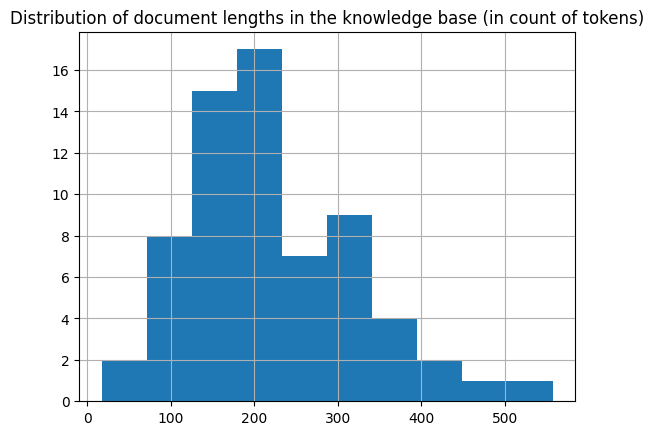

In [13]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from transformers import AutoTokenizer
from typing import List, Optional
from langchain.schema import Document as LangchainDocument # import LangchainDocument

EMBEDDING_MODEL_NAME = "thenlper/gte-small"


def split_documents(
    chunk_size: int,
    knowledge_base: List[LangchainDocument],
    tokenizer_name: Optional[str] = "nvidia/NV-Embed-v2",
) -> List[LangchainDocument]:
    """
    Split documents into chunks of maximum size `chunk_size` tokens and return a list of documents.
    """
    # text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
    #     AutoTokenizer.from_pretrained(tokenizer_name),
    #     chunk_size=chunk_size,
    #     chunk_overlap=int(chunk_size / 10),
    #     add_start_index=True,
    #     strip_whitespace=True,
    #     separators=MARKDOWN_SEPARATORS,
    # )

    # docs_processed = []
    # for doc in knowledge_base:
    #     docs_processed += text_splitter.split_documents([docs])

    # Remove duplicates
    unique_texts = {}
    docs_processed_unique = []
    for doc in docs_processed:
        if doc.page_content not in unique_texts:
            unique_texts[doc.page_content] = True
            docs_processed_unique.append(docs)

    return docs_processed_unique


# docs_processed = split_documents(
#     512,  # We choose a chunk size adapted to our model
#     RAW_KNOWLEDGE_BASE,
#     tokenizer_name=EMBEDDING_MODEL_NAME,
# )

# Let's visualize the chunk sizes we would have in tokens from a common model
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(EMBEDDING_MODEL_NAME)
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(docs)]
fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [14]:
!pip install --upgrade transformers sentence_transformers

  Using cached sentence_transformers-3.1.0-py3-none-any.whl.metadata (23 kB)
Using cached sentence_transformers-3.1.0-py3-none-any.whl (249 kB)
  Attempting uninstall: sentence_transformers
    Found existing installation: sentence-transformers 2.7.0
    Uninstalling sentence-transformers-2.7.0:
      Successfully uninstalled sentence-transformers-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ragatouille 0.0.8.post4 requires sentence-transformers<3.0.0,>=2.2.2, but you have sentence-transformers 3.1.0 which is incompatible.


In [16]:
pip install -U langchain-huggingface

In [17]:
from langchain_huggingface import HuggingFaceEmbeddings

In [ ]:
from langchain.vectorstores import FAISS
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores.utils import DistanceStrategy

embedding_model = HuggingFaceEmbeddings(
    model_name=EMBEDDING_MODEL_NAME,
    multi_process=True,
    model_kwargs={"device": "cpu"},
    encode_kwargs={"normalize_embeddings": True},  # Set `True` for cosine similarity
)

KNOWLEDGE_VECTOR_DATABASE = FAISS.from_documents(
    docs, embedding_model, distance_strategy=DistanceStrategy.COSINE
)

In [ ]:
# save KNOWLEDGE_VECTOR_DATABASE
KNOWLEDGE_VECTOR_DATABASE.save_local("knowledge_vector_database")

In [ ]:
# Embed a user query in the same space
user_query = "what is the meaning of self learning?"
query_vector = embedding_model.embed_query(user_query)

In [ ]:
import pacmap
import numpy as np
import plotly.express as px

embedding_projector = pacmap.PaCMAP(n_components=2, n_neighbors=None, MN_ratio=0.5, FP_ratio=2.0, random_state=1)

embeddings_2d = [
    list(KNOWLEDGE_VECTOR_DATABASE.index.reconstruct_n(idx, 1)[0]) for idx in range(len(docs))
] + [query_vector]

# Fit the data (the index of transformed data corresponds to the index of the original data)
documents_projected = embedding_projector.fit_transform(np.array(embeddings_2d), init="pca")

In [ ]:
df = pd.DataFrame.from_dict(
    [
        {
            "x": documents_projected[i, 0],
            "y": documents_projected[i, 1],
            "source": docs_processed[i].metadata["source"].split("/")[1],
            "extract": docs_processed[i].page_content[:100] + "...",
            "symbol": "circle",
            "size_col": 4,
        }
        for i in range(len(docs))
    ]
    + [
        {
            "x": documents_projected[-1, 0],
            "y": documents_projected[-1, 1],
            "source": "User query",
            "extract": user_query,
            "size_col": 100,
            "symbol": "star",
        }
    ]
)

# Visualize the embedding
fig = px.scatter(
    df,
    x="x",
    y="y",
    color="source",
    hover_data="extract",
    size="size_col",
    symbol="symbol",
    color_discrete_map={"User query": "black"},
    width=1000,
    height=700,
)
fig.update_traces(
    marker=dict(opacity=1, line=dict(width=0, color="DarkSlateGrey")),
    selector=dict(mode="markers"),
)
fig.update_layout(
    legend_title_text="<b>Chunk source</b>",
    title="<b>2D Projection of Chunk Embeddings via PaCMAP</b>",
)
fig.show()

In [ ]:
print(f"\nStarting retrieval for {user_query=}...")
retrieved_docs = KNOWLEDGE_VECTOR_DATABASE.similarity_search(query=user_query, k=5)
print("\n==================================Top document==================================")
print(retrieved_docs[0].page_content)
print("==================================Metadata==================================")
print(retrieved_docs[0].metadata)

In [ ]:
question = "what is self learning"

In [ ]:
docs = vectordb.similarity_search(question,k=3)

In [ ]:
len(docs)

In [ ]:
docs[0].page_content

In [ ]:
vectordb.persist()